In [19]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Prepo 1 (Visualisasi)
import missingno as mno
from fast_ml.feature_selection import get_duplicate_features

# Prepo 2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import FunctionTransformer

# Model
from imblearn.over_sampling import ADASYN
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
feature = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card.csv') 
label = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card_label.csv')

In [21]:
# Gabungkan data feature dengan label dengan Ind_ID
data = pd.merge(feature, label, on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [22]:
# Menghapus kolom Ind_ID
data = data.drop(columns=['Ind_ID'])

In [23]:
# Ubah tipe Mobile_phone, Work_phone, Phone, Email, dan label menjadi kategori
data['Mobile_phone'] = data['Mobile_phone'].astype('object')
data['Work_Phone'] = data['Work_Phone'].astype('object')
data['Phone'] = data['Phone'].astype('object')
data['EMAIL_ID'] = data['EMAIL_ID'].astype('object')
data['label'] = data['label'].astype('object')

In [24]:
# Membuang feature 'Mobile_phone' karena hanya memiliki satu nilai
data = data.drop(columns=['Mobile_phone'])

In [25]:
# Membuang feature 'Mobile_phone' karena hanya memiliki satu nilai
data = data.drop(columns=['Propert_Owner'])

In [26]:
#  want to know unique value for each category data
for col in data.select_dtypes(include=['object', 'category']):
    print(f"Unique values for {col}: {data[col].unique()}")

Unique values for GENDER: ['M' 'F' nan]
Unique values for Car_Owner: ['Y' 'N']
Unique values for Type_Income: ['Pensioner' 'Commercial associate' 'Working' 'State servant']
Unique values for EDUCATION: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Unique values for Marital_status: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Unique values for Housing_type: ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
Unique values for Work_Phone: [0 1]
Unique values for Phone: [0 1]
Unique values for EMAIL_ID: [0 1]
Unique values for Type_Occupation: [nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff' 'Security staff'
 'Medicine staff' 'Private service staff' 'HR staff' 'Secretaries'
 'Realty agents']
Uniq

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1541 non-null   object 
 1   Car_Owner        1548 non-null   object 
 2   CHILDREN         1548 non-null   int64  
 3   Annual_income    1525 non-null   float64
 4   Type_Income      1548 non-null   object 
 5   EDUCATION        1548 non-null   object 
 6   Marital_status   1548 non-null   object 
 7   Housing_type     1548 non-null   object 
 8   Birthday_count   1526 non-null   float64
 9   Employed_days    1548 non-null   int64  
 10  Work_Phone       1548 non-null   object 
 11  Phone            1548 non-null   object 
 12  EMAIL_ID         1548 non-null   object 
 13  Type_Occupation  1060 non-null   object 
 14  Family_Members   1548 non-null   int64  
 15  label            1548 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 193.6+ KB


In [28]:
data

,GENDER,Car_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,NaN,2,1
1,F,Y,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
2,F,Y,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1
3,F,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
4,F,Y,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,0,0,0,Managers,2,0
1544,F,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,0,0,0,Accountants,1,0
1545,M,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,0,0,0,Managers,4,0
1546,M,Y,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,0,Drivers,2,0


In [29]:
# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Ensure that Birthday_count is positive
data['Birthday_count'] = data['Birthday_count'].abs()

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Convert y to an integer or categorical type if needed
if y.dtype == 'object':
    y = y.astype('category').cat.codes
elif y.dtype == 'float':
    y = y.astype(int)

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Get the feature names after one-hot encoding and other preprocessing
feature_names = list(preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)) + \
                list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# Convert the resampled data into a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=feature_names)

# Convert y_train_resampled into a Series and add it to the DataFrame
y_train_resampled_df = pd.Series(y_train_resampled, name='label')

# Concatenate the features and target into a single DataFrame
resampled_df = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

In [30]:
# #  want to know unique value for each category data
# for col in data.select_dtypes(include=['object', 'category']):
#     print(f"Unique values for {col}: {X_train_resampled_df[col].unique()}")

In [31]:
# Display the first few rows of the resampled DataFrame
print(resampled_df.head())

   CHILDREN  Annual_income  Birthday_count  Employed_days  Family_Members  \
0 -0.524557       0.068595        1.223635       2.225013       -1.210632   
1  1.963570      -0.316200       -0.487832      -0.441714        0.855202   
2  0.719507       1.800171        0.226497      -0.432853        0.855202   
3 -0.524557      -0.123803        1.092168       2.225013       -1.210632   
4 -0.524557      -0.508597       -0.079063      -0.434583       -0.177715   

   Years_Employed  Income_per_Family_Member  Children_per_Family_Member  \
0        2.225012                  1.225922                   -0.622318   
1       -0.441805                 -0.680341                    2.711070   
2       -0.433845                  0.368103                    1.044376   
3        2.225012                  0.939982                   -0.622318   
4       -0.433845                 -0.489715                   -0.622318   

   GENDER_F  GENDER_M  ...  Type_Occupation_Low-skill Laborers  \
0       1.0       0.

In [32]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

Classification Report for CatBoostClassifier:
              precision    recall  f1-score   support

           0      0.974     0.807     0.883       280
           1      0.308     0.800     0.444        30

    accuracy                          0.806       310
   macro avg      0.641     0.804     0.664       310
weighted avg      0.910     0.806     0.840       310



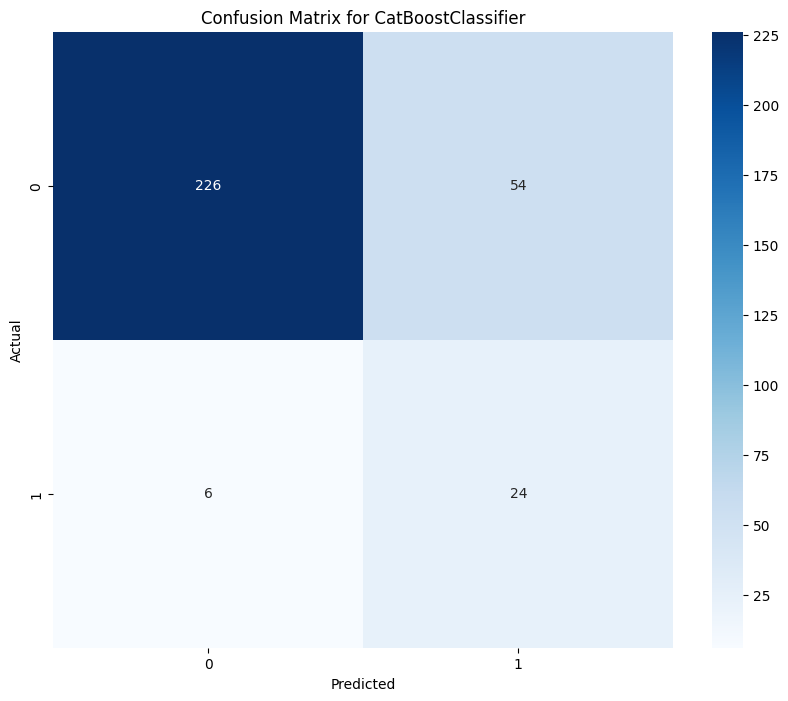

In [33]:
from sklearn.metrics import roc_curve, classification_report, confusion_matrix

# Calculate geometric mean for each threshold
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)

# Initialize models
models = {
    "CatBoost": CatBoostClassifier(random_state=0, silent=True),
}

# Function to evaluate each model
def evaluate_model(model, X_test_processed, y_test):
    # Fit the model
    model.fit(X_train_processed, y_train)
    
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test_processed)[:, 1]

    # Calculate the ROC curve points
    fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

    # Calculate specificity (1 - FPR)
    specificity = 1 - fpr

    # Calculate geometric mean for each threshold
    gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

    # Find the threshold that gives the best geometric mean
    optimal_idx = np.argmax(gmeans)
    optimal_threshold = thresholds[optimal_idx]

    # Make predictions using the optimal threshold
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred, digits=3))

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Evaluate all models
for name, model in models.items():
    evaluate_model(model, X_test_processed, y_test)


In [34]:
import joblib

# Assuming 'pipeline' is your preprocessing pipeline and 'xgb_model' is your trained model

# Save the preprocessing pipeline
joblib.dump(pipeline, 'preprocessing_pipeline.pkl')


['preprocessing_pipeline.pkl']

In [35]:
models

{'CatBoost': <catboost.core.CatBoostClassifier at 0x2d305600e10>}

In [36]:
# Save the trained model
joblib.dump(models, 'CatBoost_final_2.pkl')

['CatBoost_final_2.pkl']

In [37]:
models.feature_names_

AttributeError: 'dict' object has no attribute 'feature_names_'

In [ ]:
import joblib